# Loan Borrower Reliability Study

## Research content

1. [Purpose](#purpose)
2. [Data overview](#data_overview)
3. [Data preprocessing](#data_preprocessing)  
    3.1. [Removing gaps](#removing_gaps_1)  
    3.2. [Handling anomalous values](#abnormal_values)  
    3.3. [Removing gaps (continued)](#removing_gaps_2)  
    3.4. [Changing data types](#change_type)  
    3.5. [Duplicate handling](#duplicate_handling)  
    3.6. [Data categorization](#data_categorization)  
4. [Exploring data and answering questions](#research)  
    4.1. [Study of the relationship between the number of children and loan repayment on time](#children)  
    4.2. [Study of the relationship between marital status and loan repayment on time](#family_status)  
    4.3. [Study of the relationship between income level and loan repayment on time](#income)  
    4.4. [Study of the influence of the purpose of the loan on the repayment of the loan on time](#loan_purpose)  
5. [Research results](#research_results)

## 1. Purpose<a id='purpose'> </a>

The customer is the credit department of the bank.
Purpose - to investigate the influence of marital status and the number of children of the client on the fact of loan repayment on time.
Input data from the bank - statistics on the solvency of customers.
The results of the study will be taken into account when building a credit scoring model for potential borrowers.

## 2. Data overview <a id='data_overview'> </a>

Let's display the first 20 lines of data provided by the bank on the screen.

In [1]:
import pandas as pd
data = pd.read_csv('data.csv')
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


The table contains the following data:
* `children` - the number of children in the family
* `days_employed` - total work experience in days
* `dob_years` - client's age in years
* `education` - the level of education of the client
* `education_id` - education level identifier
* `family_status` - marital status
* `family_status_id` - marital status identifier
* `gender` - the gender of the client
* `income_type` - employment type
* `debt` - whether he had a debt to repay loans
* `total_income` - monthly income
* `purpose` - the purpose of the loan

Let's display the basic information about the dataframe:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## 3. Data preprocessing <a id='data_preprocessing'> </a>

### 3.1.  Removing gaps<a id='removing_gaps_1'> </a>

Let's output the number of missing values for each column.

In [3]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

There are missing values in two columns. One of them is `days_employed`. There are abnormal values in this column, so we will process gaps in this column after processing abnormal values. Another column with missing values, `total_income`, stores income data. The amount of income is most affected by the type of employment, so we will fill in the gaps in this column with the median value for each type from the `income_type` column.

In [4]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### 3.2. Handling anomalous values <a id='abnormal_values'> </a>

There are artifacts (anomalies) in the data of the `days_employed` column - values that do not reflect reality and appeared due to some kind of error. Such an artifact is the negative number of days of work experience in the `days_employed` column. Let's process the values in this column: replace all negative values with positive ones using the `abs()` method.

In [5]:
data['days_employed'] = data['days_employed'].abs()

For each type of employment, we will display the median value of `days_employed` work experience in days.

In [6]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

Two types (unemployed and pensioners) get abnormally large values. Correcting such values is difficult, so we will leave them as they are. Moreover, we will not need this column for research.

Let's list the unique values of the `children` column.

In [7]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

There are two anomalous values in the `children` column. Let's remove the rows that contain such anomalous values from the dataframe data.

In [8]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

List the unique values of the `children` column again to make sure the artifacts have been removed.

In [9]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### 3.3. Removing gaps (continued)<a id='removing_gaps_2'> </a>

Fill in the gaps in the `days_employed` column with the median values for each `income_type` employment type.

In [10]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Make sure all gaps are filled. Let's check and print again the number of missing values for each column.

In [11]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### 3.4. Changing data types<a id='change_type'> </a>

Let's replace the real data type in the `total_income` column with an integer one.

In [12]:
data['total_income'] = data['total_income'].astype(int)

### 3.5. Duplicate handling<a id='duplicate_handling'> </a>

Let's display the number of duplicate rows in the data. If such lines are present, delete them.

In [13]:
data.duplicated().sum()

54

In [14]:
data = data.drop_duplicates()

Let's handle implicit duplicates in the `education` column. This column has the same values, but written differently: using uppercase and lowercase letters. Let's convert them to lower case. Let's check the rest of the columns.

In [15]:
data['education'] = data['education'].str.lower()

### 3.6. Data categorization<a id='data_categorization'> </a>

Based on the ranges below, create a `total_income_category` column in the `data` dataframe with categories:

- 0–30000 - `'E'`;
- 30001–50000 - `'D'`;
- 50001–200000 - `'C'`;
- 200001–1000000 - `'B'`;
- 1000001 and above - `'A'`.

In [16]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [17]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Let's display a list of unique purposes for taking a loan from the `purpose` column.

In [18]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Let's create a function that, based on the data from the `purpose` column, will form a new `purpose_category` column, which will include the following categories:

- `'car operations'`,
- `'real estate transactions'`,
- `'conducting a wedding'`,
- `'getting an education'`.

In [19]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [20]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## 4. Exploring data and answering questions<a id='research'> </a>

### 4.1. Study of the relationship between the number of children and loan repayment on time<a id='children'> </a>

Let's build a bar graph along the `x` axis which marks categories by the number of children, and along the `y` axis - the proportion of people with loan repayment arrears for each category.

Text(0, 0.5, 'Share of people with debt')

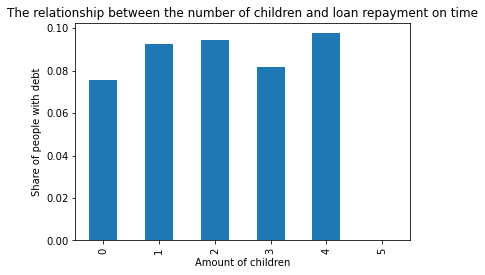

In [21]:
pivot_table_debt_by_children = data.pivot_table(index='children', values='debt', aggfunc=['mean'])
bp_debt_by_children = pivot_table_debt_by_children[('mean', 'debt')].plot(kind='bar')
bp_debt_by_children.set_title('The relationship between the number of children and loan repayment on time')
bp_debt_by_children.set_xlabel('Amount of children')
bp_debt_by_children.set_ylabel('Share of people with debt')

**Conclusion:** with an increase in the number of children, we see an increase in the number of people with loan repayment arrears, but the data for the category with 3 children is out of trend, where the percentage of debtors is less than among people with 1 and 2 children, and among people with five children and there are no people with a delay in repaying a loan. We can definitely conclude that the childless are more likely to pay on time on the loan than people with children. Since the trend towards an increase in the number of debtors with an increase in the number of children is not confirmed in two categories, it may be necessary to refine these data on a larger sample.

### 4.2. Study of the relationship between marital status and loan repayment on time<a id='family_status'> </a>

Let's build a bar chart along the `x` axis which marks categories by marital status, and along the `y` axis - the percentage of people with loan repayment arrears for each category.

Text(0, 0.5, 'Share of people with debt')

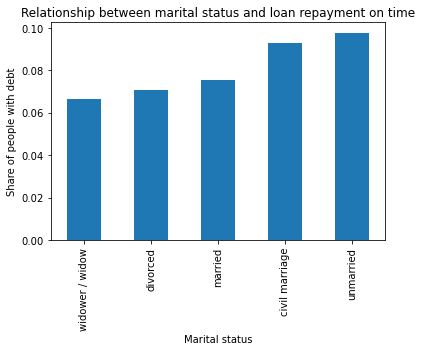

In [22]:
data = data.replace({'family_status': {'женат / замужем': 'married', 'Не женат / не замужем': 'unmarried', 'вдовец / вдова': 'widower / widow', 'гражданский брак': 'civil marriage', 'в разводе': 'divorced'}})
pivot_table_debt_by_family_status = data.pivot_table(index='family_status', values='debt', aggfunc=['mean']).sort_values(by=('mean', 'debt'))
bp_debt_by_family_status = pivot_table_debt_by_family_status[('mean', 'debt')].plot(kind='bar')
bp_debt_by_family_status.set_title('Relationship between marital status and loan repayment on time')
bp_debt_by_family_status.set_xlabel('Marital status')
bp_debt_by_family_status.set_ylabel('Share of people with debt')

**Conclusion:** there is the following relationship between marital status and loan repayment on time:
- people who are not officially married (not married / civil marriage), more often do not repay the loan on time
- divorced and widowed people are more likely to pay on time than married people.

### 4.3.  Study of the relationship between income level and loan repayment on time<a id='income'> </a>

Let's display a table of correspondence between the category of monthly income and the range of monthly income values.

In [23]:
total_income_dict = pd.DataFrame( data=[['A', '>= 1000001'], ['B', '200001–1000000'], ['C', '50001–200000'], ['D', '30001–50000'], ['E', '0–30000']], columns=['category', 'total_income'])
display(total_income_dict)

,category,total_income
0,A,>= 1000001
1,B,200001–1000000
2,C,50001–200000
3,D,30001–50000
4,E,0–30000


Let's build a bar chart along the `x` axis which marks the categories by income level, and along the `y` axis - the proportion of people with loan repayment arrears for each category.

Text(0, 0.5, 'Share of people with debt')

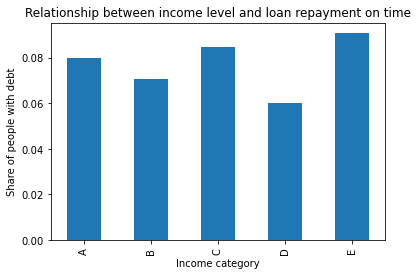

In [24]:
pivot_table_debt_by_total_income = data.pivot_table(index='total_income_category', values='debt', aggfunc=['mean'])
bp_debt_by_total_income = pivot_table_debt_by_total_income[('mean', 'debt')].plot(kind='bar')
bp_debt_by_total_income.set_title('Relationship between income level and loan repayment on time')
bp_debt_by_total_income.set_xlabel('Income category')
bp_debt_by_total_income.set_ylabel('Share of people with debt')

### 4.4. Study of the influence of the purpose of the loan on the repayment of the loan on time<a id='loan_purpose'> </a>

Let's build a bar chart along the `x` axis which marks the purpose of the loan, and along the `y` axis - the proportion of people with loan repayment arrears for each category.

Text(0, 0.5, 'Share of people with debt')

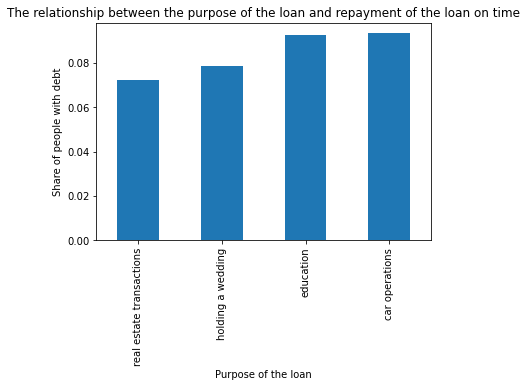

In [25]:
data = data.replace({'purpose_category': {'операции с автомобилем': 'car operations', 'операции с недвижимостью': 'real estate transactions', 'проведение свадьбы': 'holding a wedding', 'получение образования': 'education'}})
pivot_table_debt_by_purpose = data.pivot_table(index='purpose_category', values='debt', aggfunc=['mean']).sort_values(by=('mean', 'debt'))
bp_debt_by_purpose = pivot_table_debt_by_purpose[('mean', 'debt')].plot(kind='bar')
bp_debt_by_purpose.set_title('The relationship between the purpose of the loan and repayment of the loan on time')
bp_debt_by_purpose.set_xlabel('Purpose of the loan')
bp_debt_by_purpose.set_ylabel('Share of people with debt')

**Conclusion:** Loans taken out for real estate transactions and weddings are most often paid on time, and delinquency occurs more often for loans taken out for education and car transactions.

## 5. Research results<a id='research_results'> </a>

In this paper, data from the bank on the solvency of customers were studied for the influence of the marital status and the number of children of the client on the fact of repaying the loan on time.

*The number of children affects the loan repayment on time:* Childless people are less likely to have loan repayment arrears than people with children. The more children, the higher the percentage of people who are in debt. However, data for the category with 3 children is out of trend, where the percentage of debtors is less than among people with 1 and 2 children, and among people with five children there are no people with a delay in repaying the loan at all.
*Marital status affects the repayment of the loan on time:* people who are or have been married are more likely to pay on time than people who were not officially married, and divorced and widowed people pay on time more often than people who are married. It was also found that *the level of income does not affect the repayment of the loan on time:* the high income of the client does not guarantee the absence of loan repayment arrears, the largest percentage of debtors is among people with the lowest monthly income, and people with income in the range of 30,001-50,000 rubles per month are the most reliable category of borrowers who most often repay loans on time. Most often, loans taken for real estate transactions and weddings are paid on time, and delinquency occurs more often for loans taken for education and car transactions.

It is recommended to carry out work to identify the reasons for missing data on the total work experience and monthly income of the client: check the questionnaires, strengthen control over the availability of data when receiving the questionnaire, check the data transmission system. It is also recommended to re-study the effect of the number of children on loan repayment on time on a larger sample of data to refine the results.